# Examples using spreadsheet data
This example shows manipulating a spreadsheet data imported into a data frame using immigration data for Canada from 1980 to 2012.

## Start by importing the data set - you will need xlrd installed


In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel("data/Canada.xlsx", sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter = 2)
df.head()

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [2]:
# number of rows
len(df)

195

## Selecting Column data

In [3]:
#Select a column - this is a Series

df['Country']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [4]:
#Create a dataframe subset
df2 = df[['Country', 1980, 1981, 1982, 1983, 1984, 1985]]
df2.head()

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0


# Indexing is done numerically by default

In [5]:
#index values are numerical by default
df.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
#if want to use the Country as the index
df.set_index('Country', inplace=True)
df.index.values


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 

# Adding and dropping attributes

In [7]:
#Can add and drop columns:
df.drop(['Type','Coverage', 'AREA','REG','DEV'], axis=1, inplace=True)
df['Total'] = df.sum(axis=1)  #axis 1 is row
df.head()

,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Selecting rows by label, position, or filtering

In [8]:
#Select a row by label
df.loc['Bosnia and Herzegovina']


AreaName               Europe
RegName       Southern Europe
DevName     Developed regions
1980                        0
1981                        0
1982                        0
1983                        0
1984                        0
1985                        0
1986                        0
1987                        0
1988                        0
1989                        0
1990                        0
1991                        0
1992                      258
1993                     2095
1994                     2090
1995                     3007
1996                     2599
1997                     2214
1998                     2789
1999                     2737
2000                      854
2001                      801
2002                      433
2003                      267
2004                      188
2005                      211
2006                      217
2007                      209
2008                      182
2009                      156
2010      

In [9]:
#select row by index
df.iloc[2]


AreaName                Africa
RegName        Northern Africa
DevName     Developing regions
1980                        80
1981                        67
1982                        71
1983                        69
1984                        63
1985                        44
1986                        69
1987                       132
1988                       242
1989                       434
1990                       491
1991                       872
1992                       795
1993                       717
1994                       595
1995                      1106
1996                      2054
1997                      1842
1998                      2292
1999                      2389
2000                      2867
2001                      3418
2002                      3406
2003                      3072
2004                      3616
2005                      3626
2006                      4807
2007                      3623
2008                      4005
2009    

In [10]:
#select rows by filtering
df[df['RegName'] == 'Eastern Europe' ]

,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,558,439,568,524,454,438,357,277,247,7975
Bulgaria,Europe,Eastern Europe,Developed regions,24,20,12,33,11,24,33,...,1738,1419,1172,994,784,556,365,451,512,23310
Czech Republic,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,193,146,137,104,159,168,128,173,174,4192
Hungary,Europe,Eastern Europe,Developed regions,205,310,397,337,310,522,647,...,516,520,425,383,312,354,287,300,425,16822
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,...,1405,1263,1235,1267,1013,795,720,779,852,139241
Republic of Moldova,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,655,803,1099,1127,1535,1988,1367,1416,1231,15381
Romania,Europe,Eastern Europe,Developed regions,375,438,583,543,524,604,656,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,93585
Russian Federation,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,3972,3117,2983,2690,2931,2288,1963,2079,2466,63344
Slovakia,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,369,241,215,125,128,135,134,136,105,5963


# Plotting

In [11]:
#Pandas data frames directly support plotting
years = list(range(1980, 2014))  #range function creates a list from first value, but does not include last value
df.loc['Ukraine',years].plot(kind='line')


Text(0, 0.5, 'Number of immigrants')

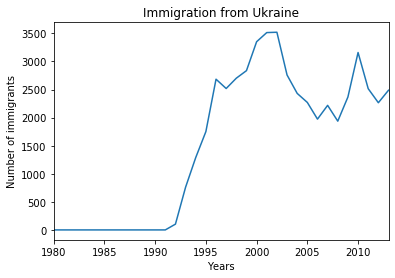

In [12]:
#But still need matlibplot to add labels, etc.
import matplotlib.pyplot as plt
df.loc['Ukraine',years].plot(kind='line')
plt.title('Immigration from Ukraine')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

# Sorting data and creating an area plot

In [13]:
df.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
df.head()

,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


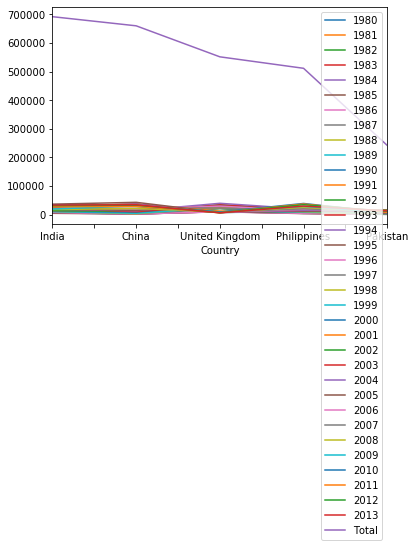

In [14]:
#Note how the data are organized - it plots a line for every column
dfTop5 = df.head()
#df.drop(['Total'], inplace=True, axis=1)
dfTop5.plot(kind='line')

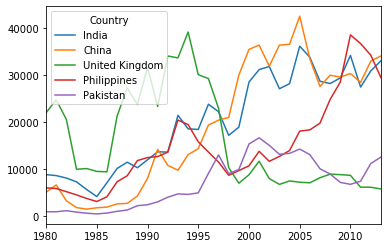

In [15]:
#Take the transpose
dfTop5 = dfTop5[years].transpose()
dfTop5.plot(kind='line')

Text(0, 0.5, 'Number of immigrants')

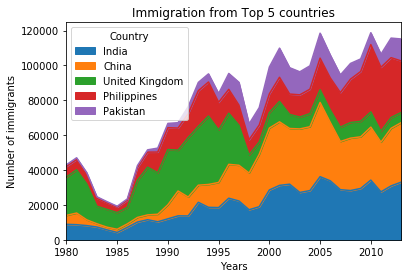

In [16]:
dfTop5.plot(kind = 'area')
plt.title('Immigration from Top 5 countries')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

# Histograms

Text(0.5, 0, 'Number of immigrants (thousands)')

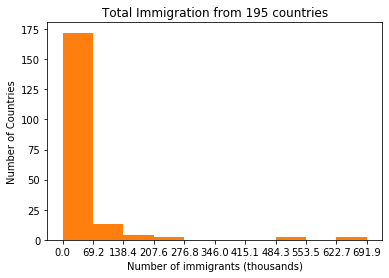

In [20]:
df['Total'] = df['Total'] / 1000
count,bins = np.histogram(df['Total'])
df['Total'].plot(kind='hist',xticks = bins)
df['Total'].plot(kind='hist')
df['Total'] = df['Total'] * 1000
plt.title('Total Immigration from 195 countries')
plt.ylabel('Number of Countries')
plt.xlabel('Number of immigrants (thousands)')

# Box plots

<img src="boxplot.PNG">

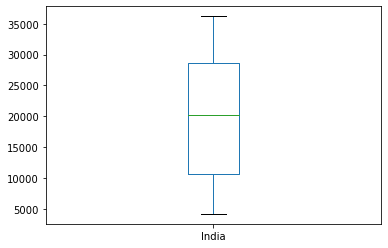

In [18]:
#visualize immigration from India to Canada
years = list(range(1980, 2014))
df_india = df.loc[['India'],years].transpose()
df_india.plot(kind='box')

Text(0, 0.5, 'Number of Immigrants')

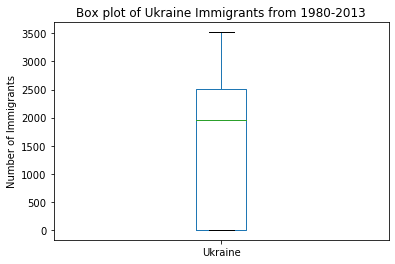

In [19]:
#visualize immigration from Ukraine to Canada
years = list(range(1980, 2014))
df_ukraine = df.loc[['Ukraine'],years].transpose()
df_ukraine.plot(kind='box')
plt.title('Box plot of Ukraine Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')